**Fake Vs real Job Posting Detection**
Data Pre processing and Exploratory Data Analysis(EDA)

Importing libraries

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import missingno as ms

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

Getting the Data

In [0]:
fake_real_data = pd.read_csv("fake_job_postings.csv")

In [33]:
fake_real_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [34]:
#Dataframe information
fake_real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [35]:
# Statistical Description of the dataset
fake_real_data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


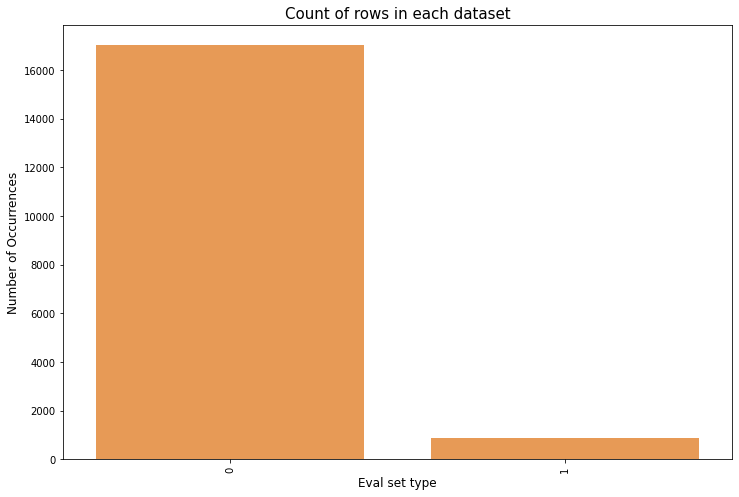

In [36]:
cnt_srs = fake_real_data.fraudulent.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Missing Values

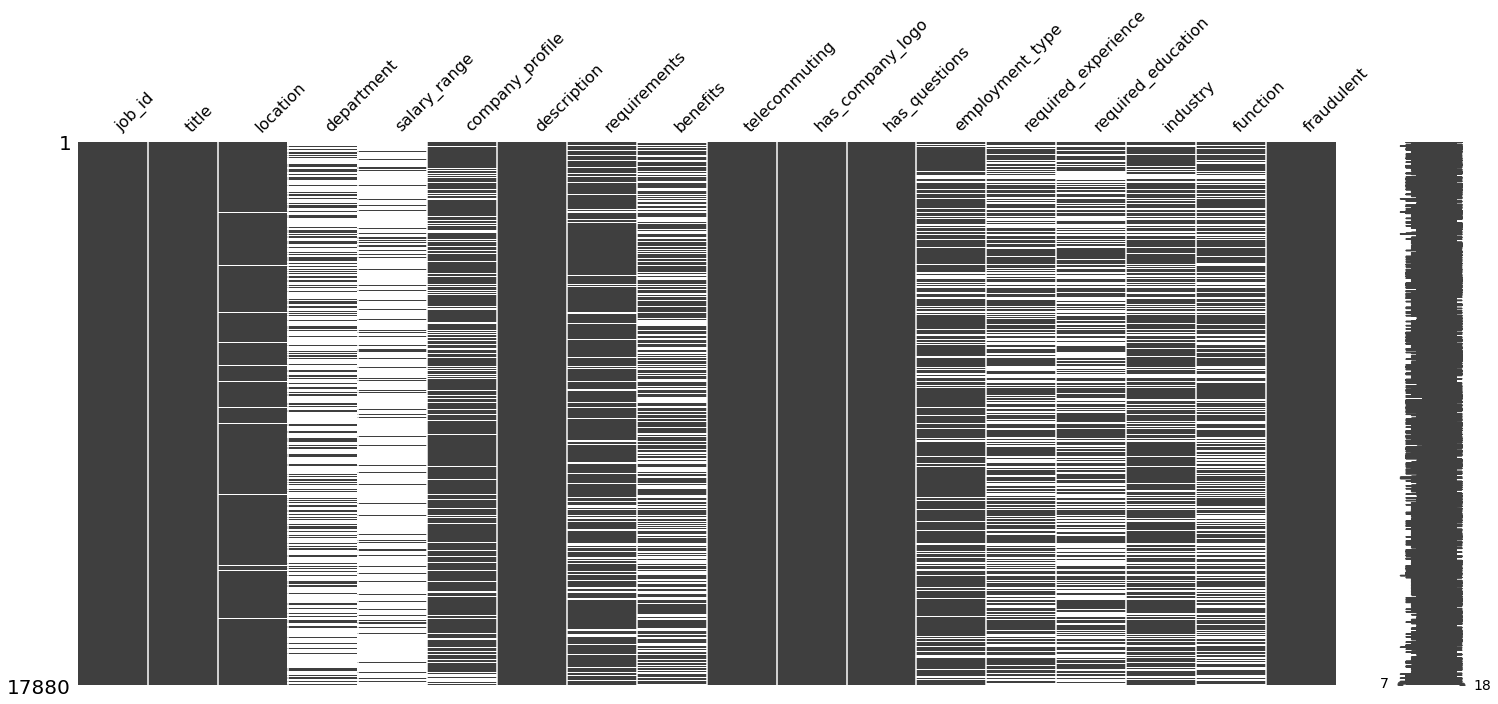

In [38]:
#Visualisation of the missing value in the entire dataset
ms.matrix(fake_real_data)
plt.show()

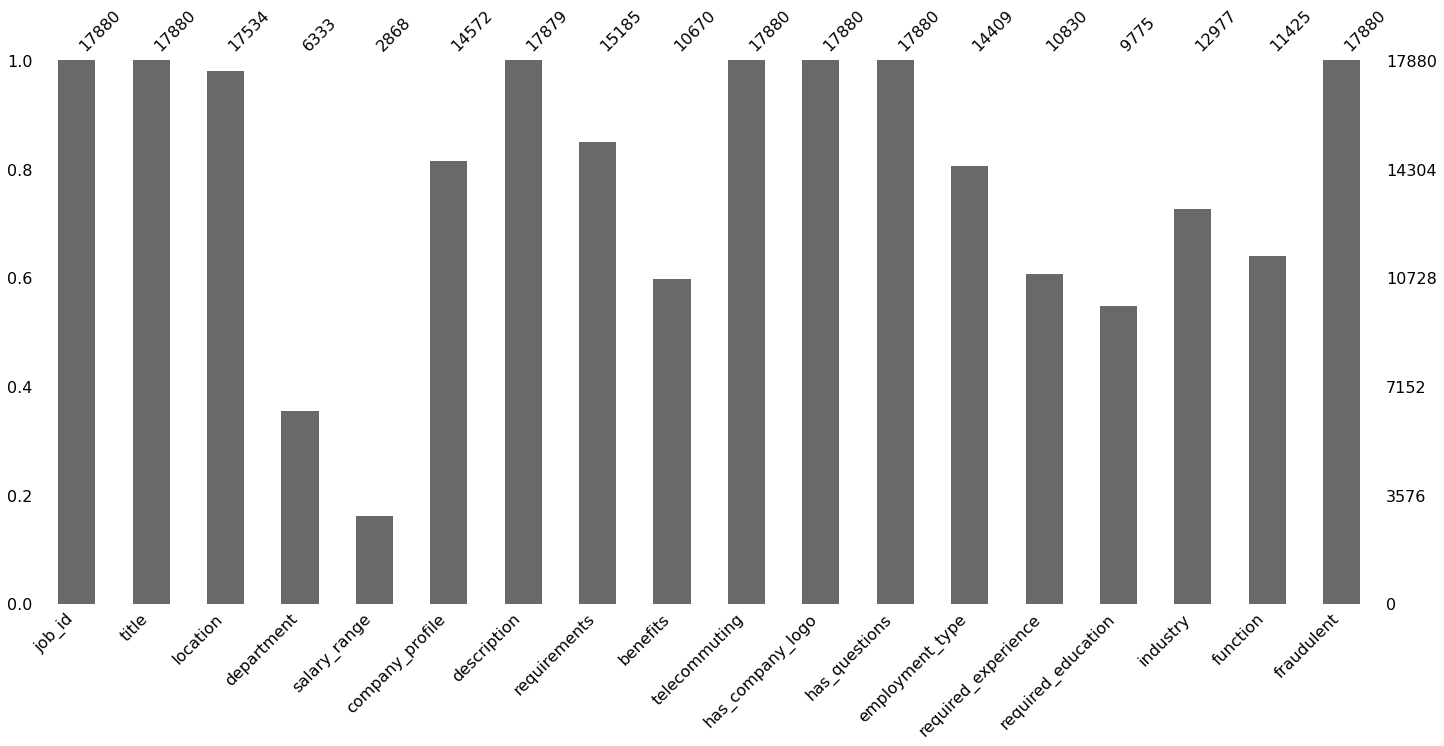

In [40]:
#missing value count
ms.bar(fake_real_data)
plt.show()

In [7]:
columns = list(fake_real_data.columns)
null_columns = dict()
type_null_columns = list()
for values in columns:
    null_values = fake_real_data[values].isnull().sum()
    if null_values > 0:
        null_columns[values] = null_values
        type_null_columns.append(type(fake_real_data[values][0]))
    print("Number of nan values in %s is %d"%(values,null_values))

Number of nan values in job_id is 0
Number of nan values in title is 0
Number of nan values in location is 346
Number of nan values in department is 11547
Number of nan values in salary_range is 15012
Number of nan values in company_profile is 3308
Number of nan values in description is 1
Number of nan values in requirements is 2695
Number of nan values in benefits is 7210
Number of nan values in telecommuting is 0
Number of nan values in has_company_logo is 0
Number of nan values in has_questions is 0
Number of nan values in employment_type is 3471
Number of nan values in required_experience is 7050
Number of nan values in required_education is 8105
Number of nan values in industry is 4903
Number of nan values in function is 6455
Number of nan values in fraudulent is 0


In [8]:
for values in columns:
    print("Number of unique values in %s is %d"%(values,fake_real_data[values].nunique()))

Number of unique values in job_id is 17880
Number of unique values in title is 11231
Number of unique values in location is 3105
Number of unique values in department is 1337
Number of unique values in salary_range is 874
Number of unique values in company_profile is 1709
Number of unique values in description is 14801
Number of unique values in requirements is 11968
Number of unique values in benefits is 6205
Number of unique values in telecommuting is 2
Number of unique values in has_company_logo is 2
Number of unique values in has_questions is 2
Number of unique values in employment_type is 5
Number of unique values in required_experience is 7
Number of unique values in required_education is 13
Number of unique values in industry is 131
Number of unique values in function is 37
Number of unique values in fraudulent is 2


In [9]:
print(null_columns)

{'location': 346, 'department': 11547, 'salary_range': 15012, 'company_profile': 3308, 'description': 1, 'requirements': 2695, 'benefits': 7210, 'employment_type': 3471, 'required_experience': 7050, 'required_education': 8105, 'industry': 4903, 'function': 6455}


In [10]:
print(type_null_columns)

[<class 'str'>, <class 'str'>, <class 'float'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'float'>, <class 'str'>, <class 'str'>, <class 'float'>, <class 'float'>, <class 'str'>]


In [11]:
length_of_dataset = len(fake_real_data)
drop_list = list()
for key,value in null_columns.items():
    if value > int(length_of_dataset * 10 /100):
        print(key,":",value)
        drop_list.append(key)

department : 11547
salary_range : 15012
company_profile : 3308
requirements : 2695
benefits : 7210
employment_type : 3471
required_experience : 7050
required_education : 8105
industry : 4903
function : 6455


In [0]:
for values in drop_list:
    fake_real_data = fake_real_data.drop(values,axis = 1)

In [13]:
fake_real_data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,Marketing Intern,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [14]:
null_list = list(null_columns.keys())
remaining_list = [item for item in null_list if item not in drop_list]
print(remaining_list)

['location', 'description']


In [0]:
fake_real_data = fake_real_data.dropna()

In [16]:
fake_real_data.isna().sum()

job_id              0
title               0
location            0
description         0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [17]:
mapping = {k: v for v, k in enumerate(fake_real_data.title.unique())}
fake_real_data['title'] = fake_real_data.title.map(mapping)
fake_real_data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,1,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,2,"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,0
3,4,3,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,4,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [18]:
mapping = {k: v for v, k in enumerate(fake_real_data.location.unique())}
fake_real_data['location'] = fake_real_data.location.map(mapping)
fake_real_data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,0,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,1,1,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,2,2,"Our client, located in Houston, is actively se...",0,1,0,0
3,4,3,3,THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,4,4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [0]:
fake_real_data = fake_real_data.drop('description',axis = 1)

In [20]:
fake_real_data.head()

,job_id,title,location,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,0,0,1,0,0
1,2,1,1,0,1,0,0
2,3,2,2,0,1,0,0
3,4,3,3,0,1,0,0
4,5,4,4,0,1,1,0


In [21]:
cor = fake_real_data.corr()
cor


,job_id,title,location,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,0.612436,0.184705,-0.004909,-0.013640,-0.088178,0.078685
title,0.612436,1.000000,0.113033,-0.006381,0.021109,-0.031114,0.051691
location,0.184705,0.113033,1.000000,-0.013424,-0.054875,-0.013587,0.080556
telecommuting,-0.004909,-0.006381,-0.013424,1.000000,-0.019339,0.020481,0.035609
has_company_logo,-0.013640,0.021109,-0.054875,-0.019339,1.000000,0.233162,-0.258901
has_questions,-0.088178,-0.031114,-0.013587,0.020481,0.233162,1.000000,-0.088870
fraudulent,0.078685,0.051691,0.080556,0.035609,-0.258901,-0.088870,1.000000


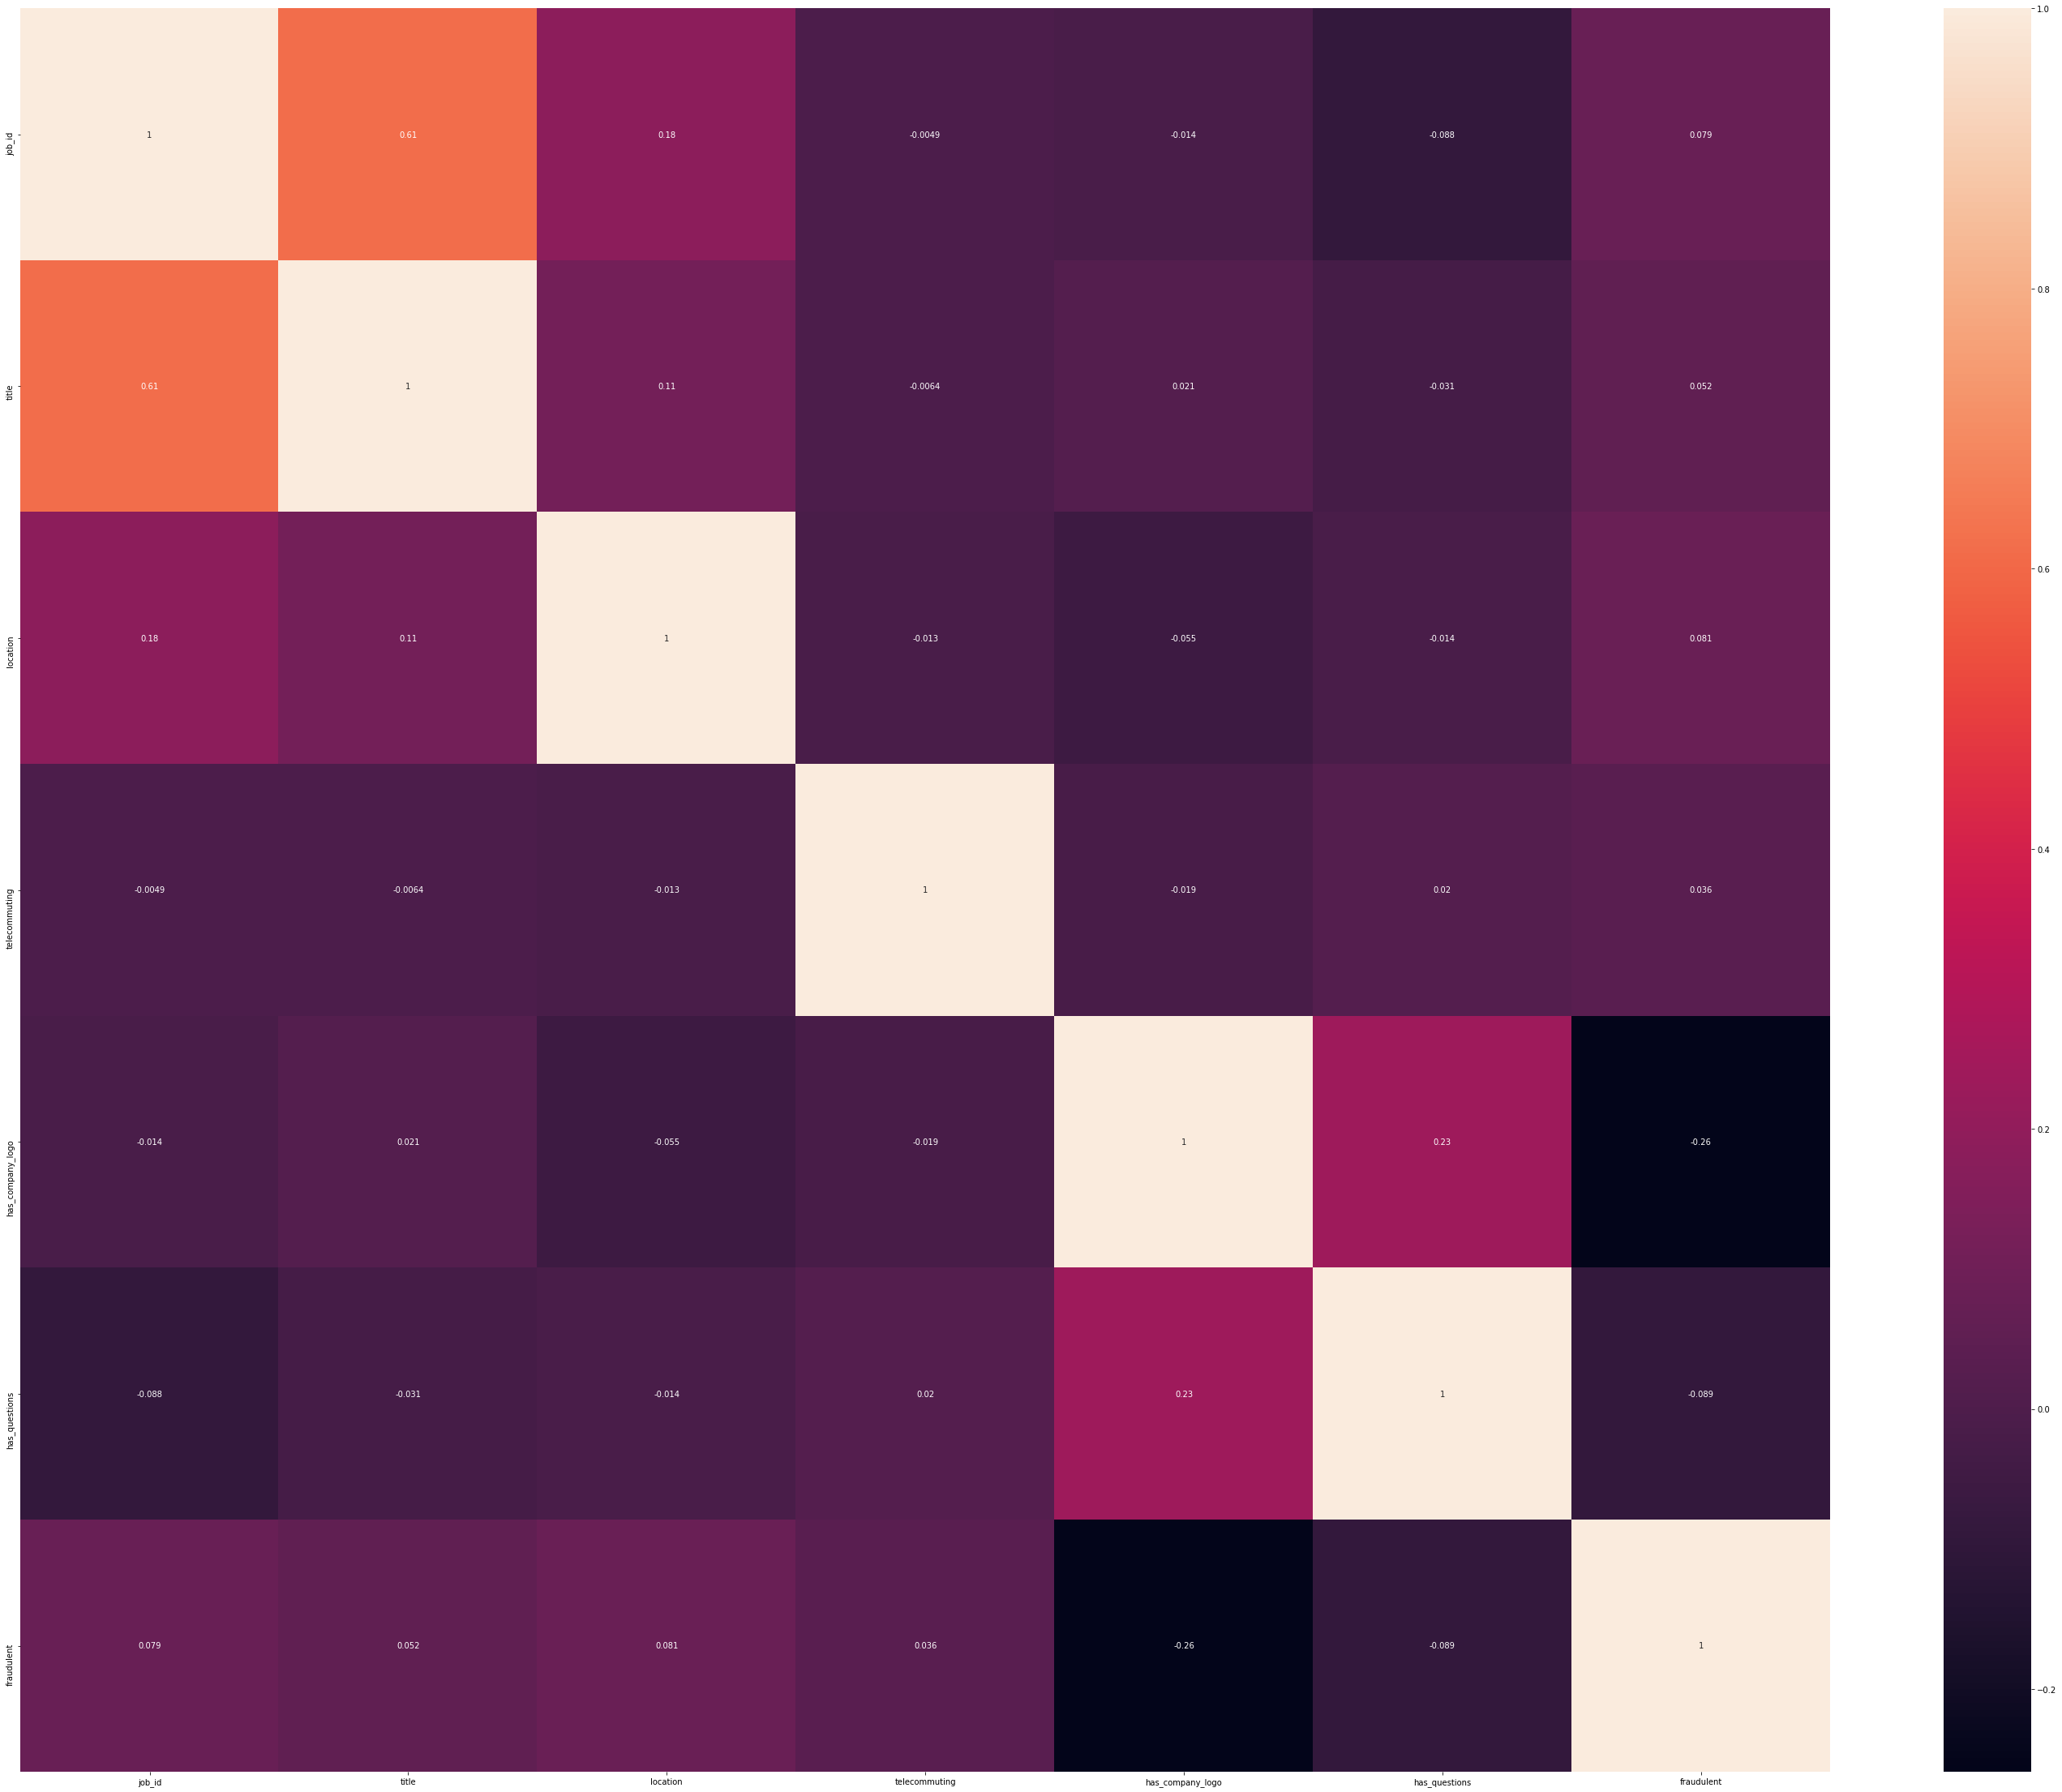

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,40))
sns.heatmap(cor,annot=True)

In [23]:
from scipy import stats
pichi_dict = {}
degree_of_freedom = {}
p_test_value = {}
expected_values = {}
column = fake_real_data.columns
names = list()
for i in range(len(column)):
    names.append(i)
data = pd.DataFrame(index=names,columns=names)
column_length = len(column)
type_dict = dict()
for i in range(column_length):
    for j in range(column_length):
        crosstab = pd.crosstab(fake_real_data[column[i]],fake_real_data[column[j]])
        g,p,dof,arr = stats.chi2_contingency(crosstab)
        pichi_dict[str(column[i])+" : "+str(column[j])] = g
        degree_of_freedom[str(column[i])+ " : " +str(column[j])] = dof
        data[i][j] = np.float64(p)
        if type(p) not in type_dict:
            type_dict[type(p)] = 1
        p_test_value[str(column[i])+ " : " + str(column[j])] = p
        expected_values[str(column[i])+str(column[j])] = arr
data.head()


,0,1,2,3,4,5,6
0,0.239746,0.28795,0.383009,0.496449,0.496449,0.496449,0.496449
1,0.28795,0,0,1.03666e-36,5.65946e-102,1.58792e-81,6.10648e-182
2,0.383009,0,0,1.28843e-30,0,5.02219e-249,0
3,0.496449,1.03666e-36,1.28843e-30,0,0.0119227,0.00748494,3.6971e-06
4,0.496449,5.65946e-102,0,0.0119227,0,4.82085e-209,6.58238e-257


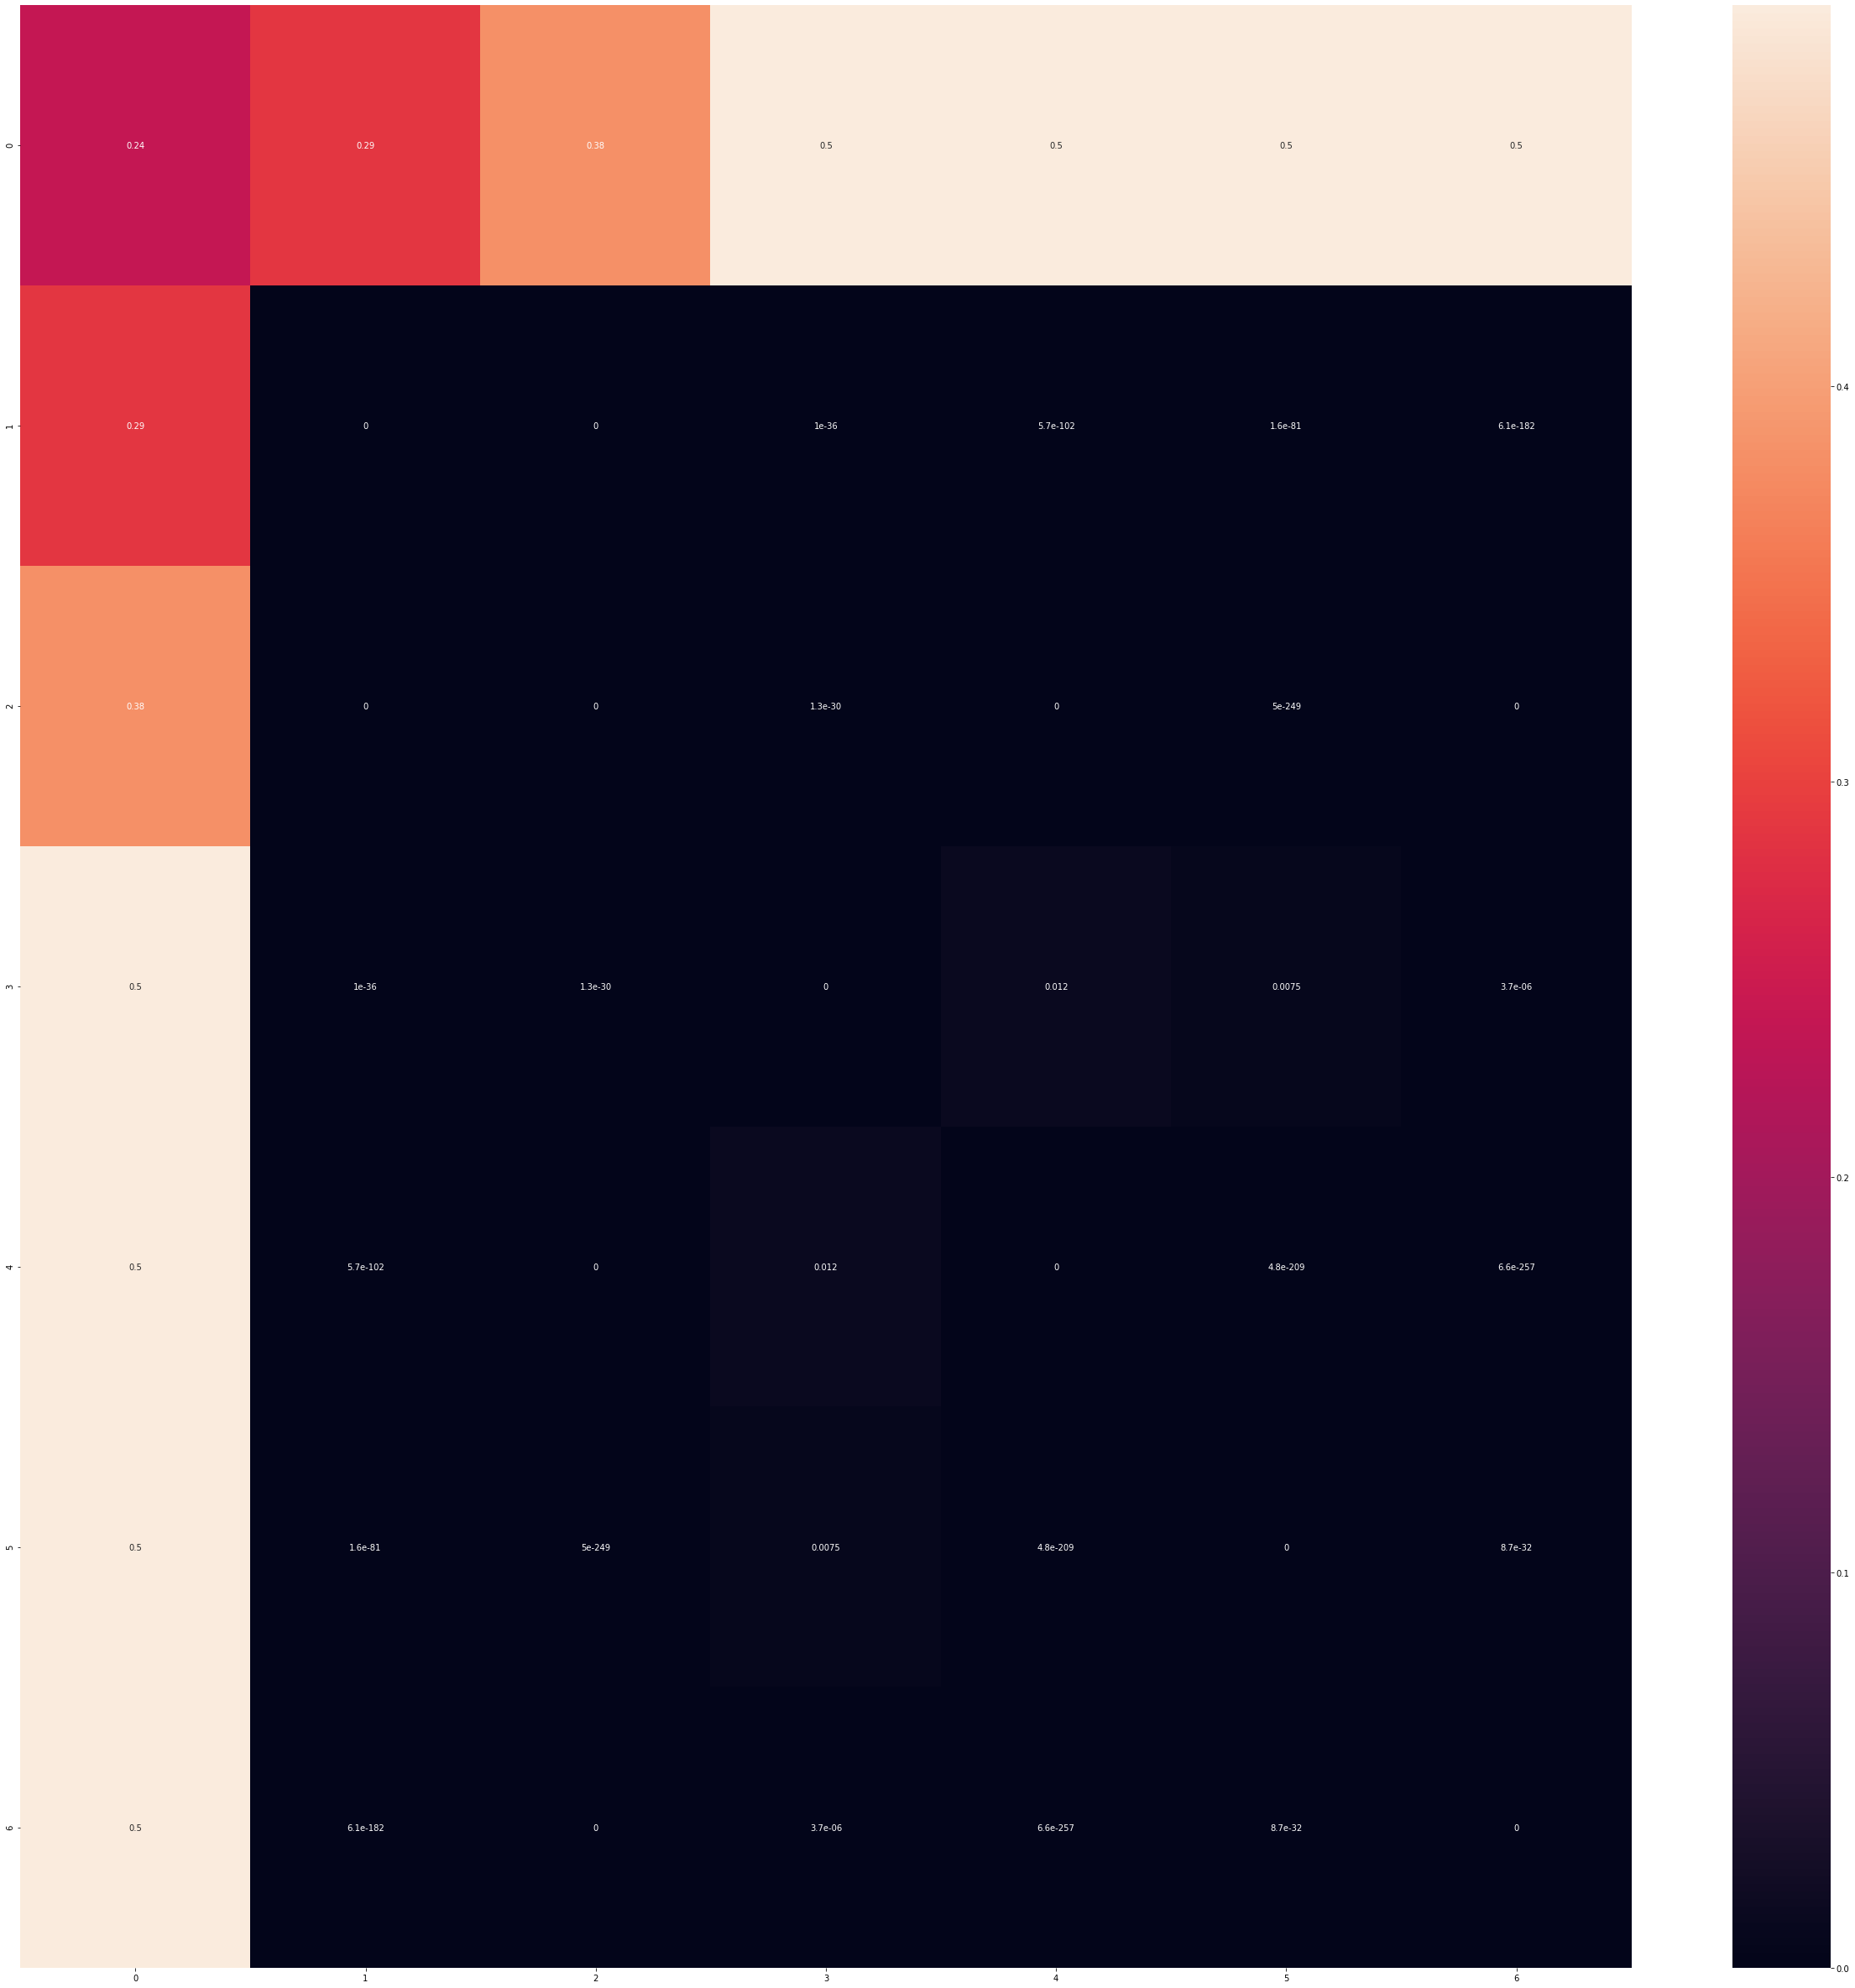

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(43,43))
data = data[data.columns].astype(float)
data.head()
sns.heatmap(data, annot = True)

Text Cleaning

In [0]:
text = fake_real_data[fake_real_data.columns[0:-1]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [70]:

import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


# Applying the cleaning function to datasets
text = text.apply(lambda x: clean_text(x))
text.head(3)

0     internus ny new yorkmarketingwere  and weve c...
1     service  cloud video productionnz   seconds t...
2     machinery assistant cmaus ia wevervalor servi...
dtype: object

**EDA**

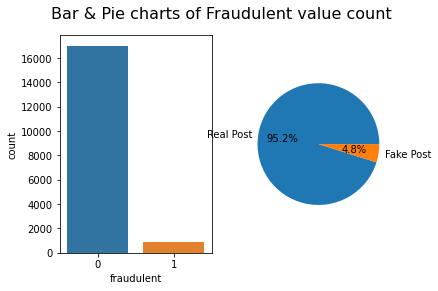

In [42]:
#Count value of target(fraudulent)
fig, ax = plt.subplots(1, 2)

sns.countplot(x='fraudulent', data=fake_real_data, ax=ax[0])
ax[1].pie(fake_real_data['fraudulent'].value_counts(), labels=['Real Post', 'Fake Post'], autopct='%1.1f%%')

fig.suptitle('Bar & Pie charts of Fraudulent value count', fontsize=16)
plt.show()

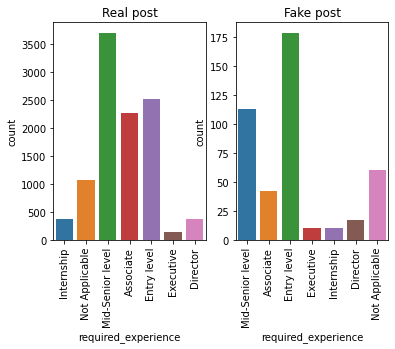

In [46]:
#Column 'Required Experience' analysis
fig, ax = plt.subplots(1, 2)

chart = sns.countplot(x = 'required_experience', data=fake_real_data[fake_real_data['fraudulent']==0], ax=ax[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax[0].set_title('Real post')

chart = sns.countplot(x = 'required_experience', data=fake_real_data[fake_real_data['fraudulent']==1], ax=ax[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax[1].set_title('Fake post')
plt.show()

In [0]:
text_df = fake_real_data[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
text_df = text_df.fillna(' ')

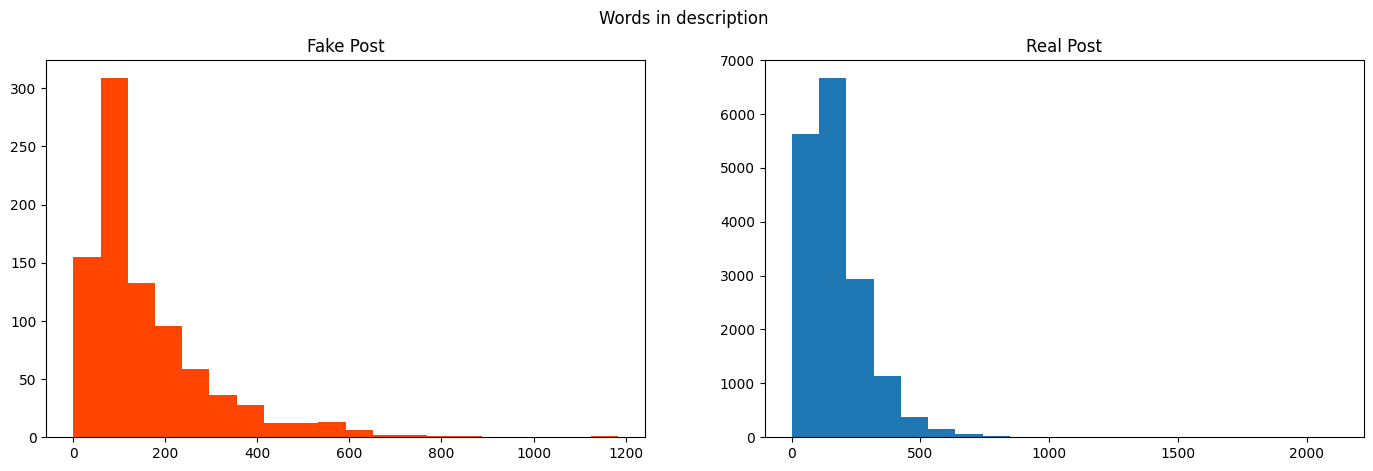

In [63]:
#Number of words (word count) on the column "Description"
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['description'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['description'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in description')
plt.show()

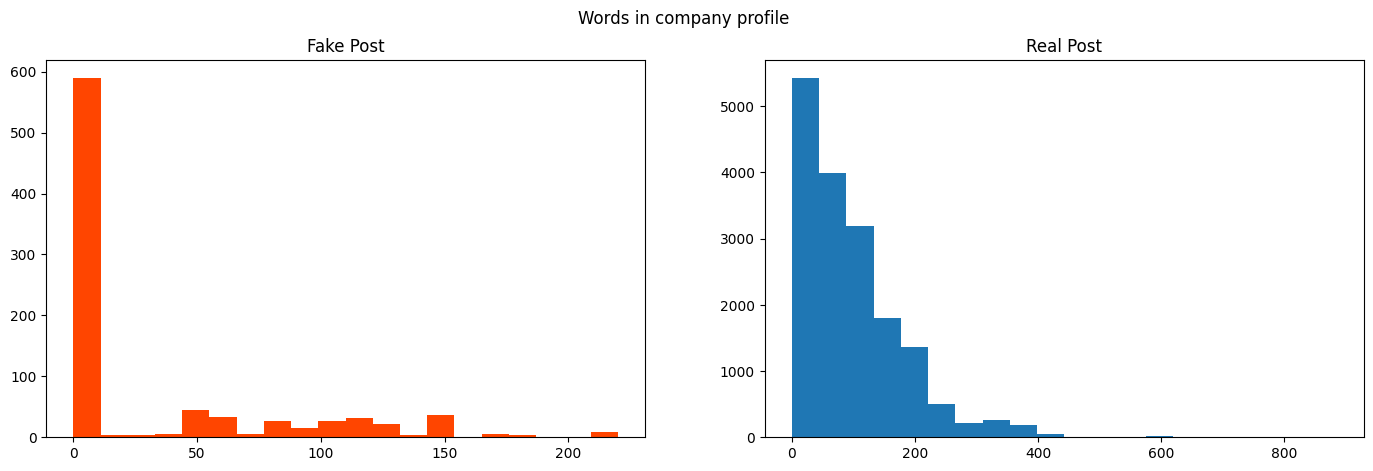

In [64]:
#Number of words (word count) on the column "Company Profile"
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in company profile')
plt.show()